In [1]:
########################################################################################################################
####----------------------------------------------Exponential Network-----------------------------------------------####
########################################################################################################################

## Generates all the plots to compare different algorithms over Exponential directed graphs using logistic regression.

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from graph import Weight_matrix, Geometric_graph, Exponential_graph, Grid_graph
from analysis import error
from Problems.logistic_regression import LR_L2
from Problems.log_reg_cifar import LR_L4
from Optimizers import COPTIMIZER as copt
from Optimizers import DOPTIMIZER as dopt

########################################################################################################################
####----------------------------------------------MNIST Classification----------------------------------------------####
########################################################################################################################
"""
Data processing for MNIST
"""
n = 4                                                       ## number of nodes 
lr_0 = LR_L2(n, limited_labels = False, balanced = True )   ## instantiate the problem class 
p = lr_0.p                                                  ## dimension of the model 
L = lr_0.L                                                  ## L-smooth constant
N = lr_0.N                                                  ## total number of training samples
b = lr_0.b                                                  ## average number of local samples
step_size = 1/L/2                                           ## selecting an appropriate step-size

"""
Initializing variables
"""
CEPOCH_base = 3000
depoch = 3000
theta_c0 = np.random.normal(0,1,p)
theta_0 = np.random.normal(0,1,(n,p)) 
UG = Grid_graph(n, 2).undirected()
B = Weight_matrix(UG).column_stochastic()


"""
Centralized solutions
"""
## solve the optimal solution of Logistic regression
theta_CGD, theta_opt, F_opt = copt.CGD(lr_0,10*1/L, CEPOCH_base,theta_c0) 
error_lr_0 = error(lr_0,theta_opt,F_opt)

data exists
data initialized
Data size 12000
client 0 3000
client 1 3000
client 2 3000
client 3 3000
feat dim 785
0 2
1 2
2 2
3 2
CGD 10% completed
CGD 20% completed
CGD 30% completed
CGD 40% completed
CGD 50% completed
CGD 60% completed
CGD 70% completed
CGD 80% completed
CGD 90% completed
CGD 100% completed
Time Span: 97.17088103294373


In [2]:
learning_rate = 10*1/L
step_size = 1/50
batch_size = 12000

In [3]:
theta_SGD, theta_opt, F_opt = copt.SGD(lr_0,learning_rate, CEPOCH_base,theta_c0, batch_size) 
res_F_SGD = error_lr_0.cost_gap_path(theta_SGD)

SGD 10% completed
SGD 20% completed
SGD 30% completed
SGD 40% completed
SGD 50% completed
SGD 60% completed
SGD 70% completed
SGD 80% completed
SGD 90% completed
SGD 100% completed
2999 Round | 4# Updates | 3000 Batch Size
Time Span: 79.10283589363098


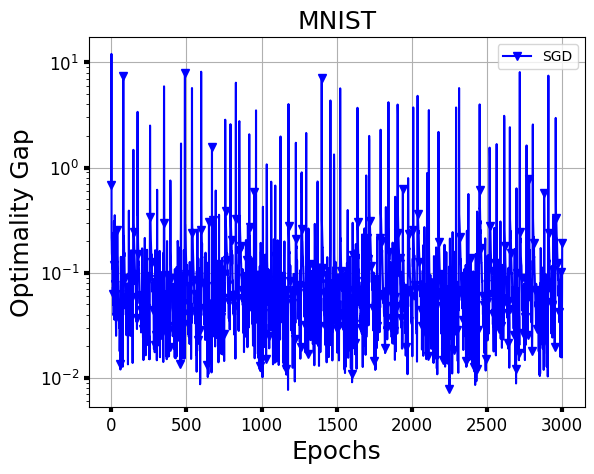

In [4]:
"""
Save plot
"""
mark_every = 10
font = FontProperties()
font.set_size(18)
font2 = FontProperties()
font2.set_size(10)
plt.figure(3)
plt.plot(res_F_SGD,'-vb', markevery = mark_every)
plt.grid(True)
plt.yscale('log')
plt.tick_params(labelsize='large', width=3)
plt.title('MNIST', fontproperties=font)
plt.xlabel('Epochs', fontproperties=font)
plt.ylabel('Optimality Gap', fontproperties=font)
plt.legend(('SGD', 'RR', 'DSGD', 'DRR'), prop=font2)

In [5]:
theta_RR, theta_opt, F_opt = copt.C_RR(lr_0,learning_rate, CEPOCH_base,theta_c0, batch_size) 
res_F_RR = error_lr_0.cost_gap_path(theta_RR)

C_RR 10% completed
C_RR 20% completed
C_RR 30% completed
C_RR 40% completed
C_RR 50% completed
C_RR 60% completed
C_RR 70% completed
C_RR 80% completed
C_RR 90% completed
C_RR 100% completed
2999 Round | 12.0# Updates | 1028 Batch Size
Time Span: 180.32304310798645


In [9]:
theta_D_SGD = dopt.D_SGD(lr_0,B,step_size,int(depoch), theta_0, batch_size, 1)  
res_F_D_SGD = error_lr_0.cost_gap_path( np.sum(theta_D_SGD,axis = 1)/n)

D_SGD 10% completed
D_SGD 20% completed
D_SGD 30% completed
D_SGD 40% completed
D_SGD 50% completed
D_SGD 60% completed
D_SGD 70% completed
D_SGD 80% completed
D_SGD 90% completed
D_SGD 100% completed
2999 Round | 3# Updates | 1028 Batch Size
Time Span: 123.73759579658508


In [4]:
theta_D_RR = dopt.D_RR(lr_0,B,step_size,int(depoch), theta_0, batch_size, 1)  
res_F_D_RR = error_lr_0.cost_gap_path( np.sum(theta_D_RR,axis = 1)/n)

D_RR 10% completed
D_RR 20% completed
D_RR 30% completed
D_RR 40% completed
D_RR 50% completed
D_RR 60% completed
D_RR 70% completed
D_RR 80% completed
D_RR 90% completed
D_RR 100% completed
2999 Round | 3084# Updates | 1028 Batch Size
Time Span: 177.27930092811584


In [5]:
"""
Save data
"""
dir_path = "plots/Grid_4n"

# np.savetxt(f'{dir_path}/MnistResSGD.txt', res_F_SGD)
# np.savetxt(f'{dir_path}/MnistResRR.txt', res_F_RR)
# np.savetxt(f'{dir_path}/MnistResDSGD.txt', res_F_D_SGD)
res_F_SGD = np.loadtxt(f'{dir_path}/MnistResSGD.txt', )
res_F_RR = np.loadtxt(f'{dir_path}/MnistResRR.txt', )
res_F_D_SGD = np.loadtxt(f'{dir_path}/MnistResDSGD.txt')
np.savetxt(f'{dir_path}/MnistResDRR.txt', res_F_D_RR)

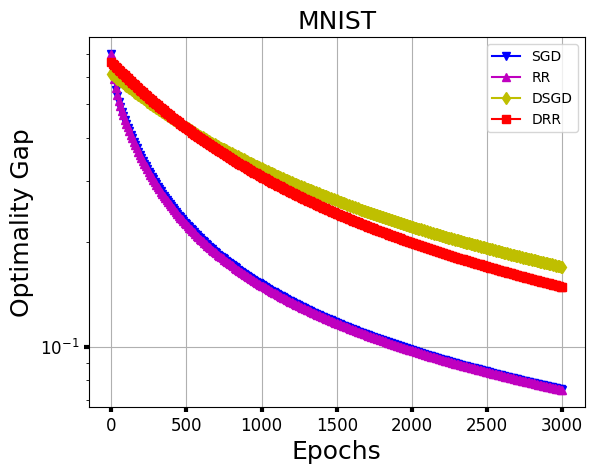

In [6]:
"""
Save plot
"""
mark_every = 10
font = FontProperties()
font.set_size(18)
font2 = FontProperties()
font2.set_size(10)
plt.figure(3)
plt.plot(res_F_SGD,'-vb', markevery = mark_every)
plt.plot(res_F_RR,'-^m', markevery = mark_every)
plt.plot(res_F_D_SGD,'-dy', markevery = mark_every)
plt.plot(res_F_D_RR,'-sr', markevery = mark_every)
plt.grid(True)
plt.yscale('log')
plt.tick_params(labelsize='large', width=3)
plt.title('MNIST', fontproperties=font)
plt.xlabel('Epochs', fontproperties=font)
plt.ylabel('Optimality Gap', fontproperties=font)
plt.legend(('SGD', 'RR', 'DSGD', 'DRR'), prop=font2)
plt.savefig(f'{dir_path}/ExpCifar.pdf', format = 'pdf', dpi = 4000, bbox_inches='tight')

/opt/anaconda3/envs/DRR/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


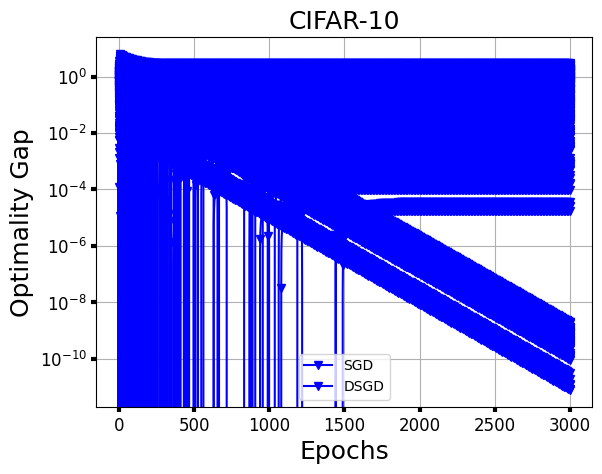

In [4]:
"""
Save plot
"""
mark_every = 10
font = FontProperties()
font.set_size(18)
font2 = FontProperties()
font2.set_size(10)
plt.figure(3)
plt.plot(res_F_SGD,'-vb', markevery = mark_every)
# plt.plot(res_F_D_SGD,'-^m', markevery = mark_every)

plt.grid(True)
plt.yscale('log')
plt.tick_params(labelsize='large', width=3)
plt.title('CIFAR-10', fontproperties=font)
plt.xlabel('Epochs', fontproperties=font)
plt.ylabel('Optimality Gap', fontproperties=font)
plt.legend(('SGD', 'DSGD'), prop=font2)
plt.show()
# plt.savefig('plots/ExpCifar.pdf', format = 'pdf', dpi = 4000, bbox_inches='tight')